In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Train_stock.csv")

# In this project we use the dataset for google stock and from opening values we have to predict to the opening price for jan month

In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
#step 1 data preprocessing
training_data=data.iloc[:,1:2].values #use values to convert it into numpy array

In [10]:
training_data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [12]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

In [294]:
sc=MinMaxScaler(feature_range=(0,1))#transform values between 0 to 1
training_data_scaled=sc.fit_transform(training_data)            

In [17]:
training_data_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [129]:
#creating data structure  with 60 timestamps and 1 output
#60 timestamps mean by observing previous 60 values we find our output
X_train=[]
y_train=[]
for i in range(60,len(training_data_scaled)):
    X_train.append(training_data_scaled[i-60:i,0])
    y_train.append(training_data_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [130]:
#before creating rnn we have to reshape our input data
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [136]:
#building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [137]:
#intializing the model
regressor=Sequential()

In [139]:
#adding a lstm layer and some dropout regularisation units means number of neuron
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#adding a second layer of lstm with some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#adding a third layer of lstm with some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#adding a fourth layer od lstm with some dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#adding the output layer
regressor.add(Dense(units=1))

#compiling the rnn
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [140]:
#fitting the data into regressor
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0312
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0056
Epoch 7/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0038
Epoch 12/100
1198/1198 [==============================] - 7s 6ms/step 

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0016


In [290]:
regressor.save("stock")

In [172]:
#making the prediction and visualizing the results
#getting the stock price of jan 2017
dataset_test=pd.read_csv("Test_stock.csv")
real_stock_price=dataset_test.iloc[:,1:2].values

In [266]:
dataset_total=pd.concat((data['Open'],dataset_test['Open']),axis=0)

In [278]:
inp=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [283]:
inp=inp.reshape(-1,1)

In [296]:
inp=sc.transform(inp)

In [300]:
X_test=[]
for i in range(60, 80):
    X_test.append(inp[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)#back to the normal data

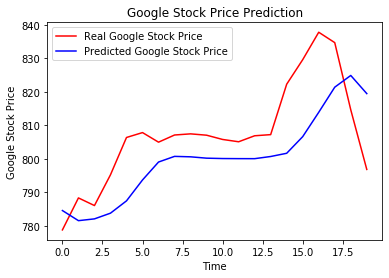

In [301]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
